# 02_b. Deep Learning Basic Models for NLP

* 파이썬을 이용한 딥러닝 기반 자연어처리
* 김무성

------------------

# 차례
* MLP
* CNN
* RNN
* Attention
* Memory

--------------------

<img src="https://cdn-images-1.medium.com/max/1600/1*Vkuwvn_CglqdbUc_lXJpmw.png" width=600 />

* 출처 - https://towardsdatascience.com/machine-learning-word-embedding-sentiment-classification-using-keras-b83c28087456

In [53]:
# 텍스트 분류 기본 DataSet 설정

In [1]:
import tensorflow as tf
import data_util

In [2]:
train_tup, test_tup, index_tup, max_words = data_util.imdb_load_data(max_words=1000)

In [3]:
train_data, train_labels = train_tup
test_data, test_labels = test_tup
word_index, reverse_word_index = index_tup

In [5]:
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

# MLP

<img src="https://blog.feedly.com/wp-content/uploads/2019/03/Screen-Shot-2019-03-06-at-12.07.45-PM.png" width=600 />

*출처 - https://blog.feedly.com/nlp-breakfast-2-the-rise-of-language-models/

## Vanilla MLP

In [27]:
vocab_size = max_words

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 16, input_shape=(256,)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 256, 16)           16000     
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                65552     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 81,569
Trainable params: 81,569
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(test_data, test_labels)

print(results)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 53us/sample - loss: 0.6894 - accuracy: 0.5331 - val_loss: 0.6807 - val_accuracy: 0.5711
Epoch 2/40
15000/15000 [==============================] - 0s 31us/sample - loss: 0.6331 - accuracy: 0.6719 - val_loss: 0.5804 - val_accuracy: 0.7194
Epoch 3/40
15000/15000 [==============================] - 0s 31us/sample - loss: 0.4771 - accuracy: 0.7986 - val_loss: 0.4419 - val_accuracy: 0.8015
Epoch 4/40
15000/15000 [==============================] - 0s 33us/sample - loss: 0.3675 - accuracy: 0.8461 - val_loss: 0.3867 - val_accuracy: 0.8263
Epoch 5/40
15000/15000 [==============================] - 0s 30us/sample - loss: 0.3110 - accuracy: 0.8718 - val_loss: 0.3726 - val_accuracy: 0.8344
Epoch 6/40
15000/15000 [==============================] - 0s 32us/sample - loss: 0.2780 - accuracy: 0.8882 - val_loss: 0.3651 - val_accuracy: 0.8418
Epoch 7/40
15000/15000 [==============================] 

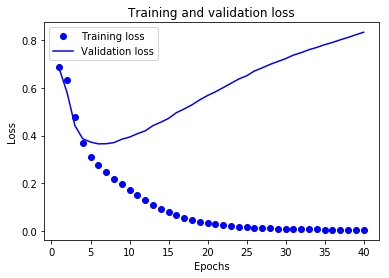

In [29]:
%matplotlib inline 

import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

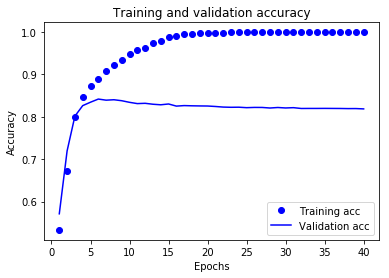

In [30]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## MaxPooling Layer 추가

<img src="https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png" width=600 />

* 출처 - https://computersciencewiki.org/index.php/Max-pooling_/_Pooling

In the case of max pooling you take the maximum value of all features in the pool for each feature dimension. In the case of average pooling you take the average, but max pooling seems to be more commonly used as it highlights large values.

In [58]:
# 앞의 실습 모델이 jupyter notebook 상에 계속 연결되므로 정리해주는 코드를 추가  
tf.keras.backend.clear_session()

In [59]:
vocab_size = max_words

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          16000     
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 16,289
Trainable params: 16,289
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(test_data, test_labels)

print(results)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 44us/sample - loss: 0.6922 - accuracy: 0.5314 - val_loss: 0.6906 - val_accuracy: 0.6043
Epoch 2/40
15000/15000 [==============================] - 0s 30us/sample - loss: 0.6876 - accuracy: 0.7015 - val_loss: 0.6826 - val_accuracy: 0.7242
Epoch 3/40
15000/15000 [==============================] - 1s 34us/sample - loss: 0.6717 - accuracy: 0.7483 - val_loss: 0.6584 - val_accuracy: 0.7494
Epoch 4/40
15000/15000 [==============================] - 1s 34us/sample - loss: 0.6380 - accuracy: 0.7683 - val_loss: 0.6167 - val_accuracy: 0.7735
Epoch 5/40
15000/15000 [==============================] - 1s 34us/sample - loss: 0.5847 - accuracy: 0.7886 - val_loss: 0.5564 - val_accuracy: 0.7845
Epoch 6/40
15000/15000 [==============================] - 0s 31us/sample - loss: 0.5193 - accuracy: 0.8015 - val_loss: 0.4945 - val_accuracy: 0.7976
Epoch 7/40
15000/15000 [==============================] 

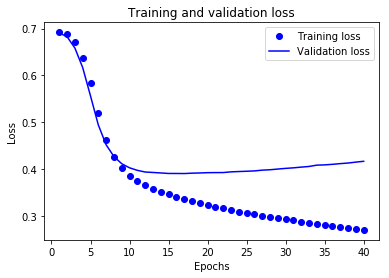

In [61]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.clf()   # 그림을 초기화합니다

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

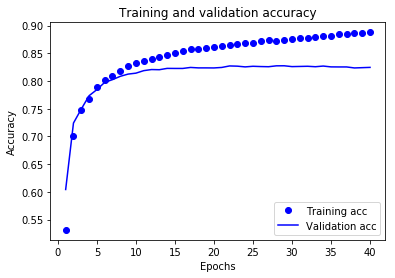

In [62]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

--------------------

# CNN

<img src="https://github.com/Tixierae/deep_learning_NLP/raw/master/cnn_illustration.png" width=600 />

* 출처 - https://github.com/Tixierae/deep_learning_NLP

## 1-D CNN

<img src="https://files.realpython.com/media/njanakiev-1d-convolution.d7afddde2776.png" width=600 />

* 출처 - https://realpython.com/python-keras-text-classification/

In [39]:
# 앞의 실습 모델이 jupyter notebook 상에 계속 연결되므로 정리해주는 코드를 추가  
tf.keras.backend.clear_session()

In [40]:
vocab_size = max_words

embedding_dims = 16
filters = 70
kernel_size = 3
hidden_dims = 70

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                    embedding_dims, 
                                    input_shape=(None,)))
model.add(tf.keras.layers.Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(tf.keras.layers.Conv1D(filters,
                                 kernel_size,
                                 padding='valid',
                                 activation='relu',
                                 strides=1))
# we use max pooling:
model.add(tf.keras.layers.GlobalAveragePooling1D())

# We add a vanilla hidden layer:
model.add(tf.keras.layers.Dense(hidden_dims))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          16000     
_________________________________________________________________
dropout (Dropout)            (None, None, 16)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 70)          3430      
_________________________________________________________________
global_average_pooling1d (Gl (None, 70)                0         
_________________________________________________________________
dense (Dense)                (None, 70)                4970      
_________________________________________________________________
dropout_1 (Dropout)          (None, 70)                0         
_________________________________________________________________
activation (Activation)      (None, 70)                0

In [41]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(test_data, test_labels)

print(results)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 4s 243us/sample - loss: 0.6929 - accuracy: 0.5126 - val_loss: 0.6919 - val_accuracy: 0.5728
Epoch 2/40
15000/15000 [==============================] - 4s 263us/sample - loss: 0.6862 - accuracy: 0.6199 - val_loss: 0.6723 - val_accuracy: 0.6736
Epoch 3/40
15000/15000 [==============================] - 4s 237us/sample - loss: 0.6347 - accuracy: 0.7023 - val_loss: 0.5770 - val_accuracy: 0.7348
Epoch 4/40
15000/15000 [==============================] - 3s 220us/sample - loss: 0.5119 - accuracy: 0.7775 - val_loss: 0.4471 - val_accuracy: 0.8116
Epoch 5/40
15000/15000 [==============================] - 3s 220us/sample - loss: 0.4117 - accuracy: 0.8230 - val_loss: 0.3921 - val_accuracy: 0.8266
Epoch 6/40
15000/15000 [==============================] - 3s 219us/sample - loss: 0.3770 - accuracy: 0.8360 - val_loss: 0.3776 - val_accuracy: 0.8339
Epoch 7/40
15000/15000 [==========================

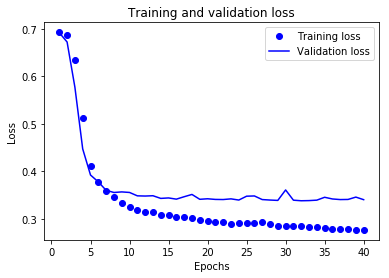

In [42]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.clf()   # 그림을 초기화합니다

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

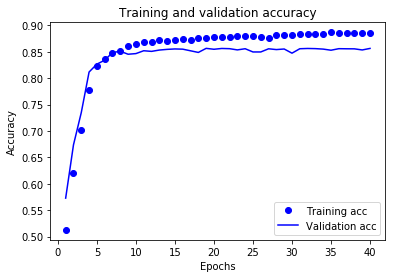

In [43]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

---------------------

# RNN

<img src="https://blog.feedly.com/wp-content/uploads/2019/03/Screen-Shot-2019-03-06-at-12.08.35-PM.png" width=600 />

* 출처 - https://blog.feedly.com/nlp-breakfast-2-the-rise-of-language-models/

## LSTM

In [44]:
# 앞의 실습 모델이 jupyter notebook 상에 계속 연결되므로 정리해주는 코드를 추가  
tf.keras.backend.clear_session()

In [45]:
vocab_size = max_words

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                4224      
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 20,769
Trainable params: 20,769
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(test_data, test_labels)

print(results)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 11s 756us/sample - loss: 0.6925 - accuracy: 0.5187 - val_loss: 0.6915 - val_accuracy: 0.5404
Epoch 2/40
15000/15000 [==============================] - 9s 633us/sample - loss: 0.6782 - accuracy: 0.5923 - val_loss: 0.6349 - val_accuracy: 0.6621
Epoch 3/40
15000/15000 [==============================] - 10s 693us/sample - loss: 0.5622 - accuracy: 0.7277 - val_loss: 0.4859 - val_accuracy: 0.7880
Epoch 4/40
15000/15000 [==============================] - 10s 643us/sample - loss: 0.4276 - accuracy: 0.8182 - val_loss: 0.4076 - val_accuracy: 0.8236
Epoch 5/40
15000/15000 [==============================] - 10s 666us/sample - loss: 0.3671 - accuracy: 0.8497 - val_loss: 0.3771 - val_accuracy: 0.8401
Epoch 6/40
15000/15000 [==============================] - 10s 641us/sample - loss: 0.3498 - accuracy: 0.8582 - val_loss: 0.3722 - val_accuracy: 0.8455
Epoch 7/40
15000/15000 [=====================

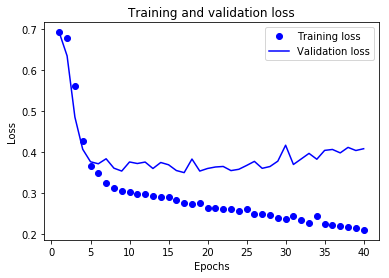

In [47]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.clf()   # 그림을 초기화합니다

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

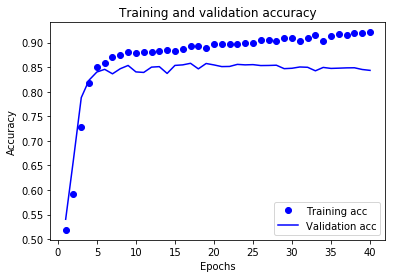

In [48]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Stack two or more LSTM layers

In [49]:
# 앞의 실습 모델이 jupyter notebook 상에 계속 연결되므로 정리해주는 코드를 추가  
tf.keras.backend.clear_session()

In [50]:
vocab_size = max_words

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        16, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          16000     
_________________________________________________________________
bidirectional (Bidirectional (None, None, 32)          4224      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 16)                2624      
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 23,137
Trainable params: 23,137
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(test_data, test_labels)

print(results)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 22s 1ms/sample - loss: 0.6925 - accuracy: 0.5187 - val_loss: 0.6907 - val_accuracy: 0.5521
Epoch 2/40
15000/15000 [==============================] - 22s 1ms/sample - loss: 0.6465 - accuracy: 0.6576 - val_loss: 0.5621 - val_accuracy: 0.7494
Epoch 3/40
15000/15000 [==============================] - 19s 1ms/sample - loss: 0.4851 - accuracy: 0.7951 - val_loss: 0.4224 - val_accuracy: 0.8225
Epoch 4/40
15000/15000 [==============================] - 18s 1ms/sample - loss: 0.3879 - accuracy: 0.8403 - val_loss: 0.3768 - val_accuracy: 0.8435
Epoch 5/40
15000/15000 [==============================] - 19s 1ms/sample - loss: 0.3472 - accuracy: 0.8587 - val_loss: 0.3677 - val_accuracy: 0.8499
Epoch 6/40
15000/15000 [==============================] - 20s 1ms/sample - loss: 0.3239 - accuracy: 0.8706 - val_loss: 0.3596 - val_accuracy: 0.8480
Epoch 7/40
15000/15000 [==============================] 

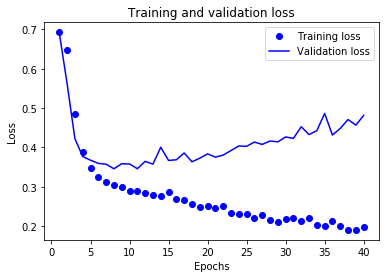

In [54]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.clf()   # 그림을 초기화합니다

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

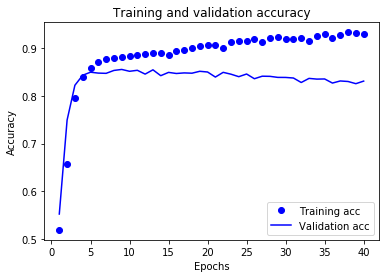

In [55]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

--------------------

# Attention

-------------------

# Memory

----------------------

# 참고자료
*  Beyond Word Embeddings Part 2 - https://towardsdatascience.com/beyond-word-embeddings-part-2-word-vectors-nlp-modeling-from-bow-to-bert-4ebd4711d0ec